#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

/var/folders/nx/mn2x9gc96r7518nvkqy7d9kr0000gn/T/ipykernel_41691/2379448603.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Functions

In [76]:
def correlation_analysis(df):
    return df.corr(method='pearson')

def visualize_correlation(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

def data_distribution(df):
    df.hist(figsize=(12, 10))
    plt.show()

def feature_importance(X, y):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
    return feature_importances

def dimensionality_reduction(X, n_components=2):
    pca = PCA()
    X_pca = pca.fit(X)
    
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax(cumsum >= 0.95) + 1
    return d, pca

def visualize_feature_relationships(df):
    """
    Due to the large size of the df i will use df.corr and create a heatmap
    """
    sns.pairplot(df)
    plt.show()

def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df < lower_bound) | (df > upper_bound)).sum()
    return outliers

def label_imbalance(y):
    class_counts = y.value_counts()
    return class_counts

#### Read the data

In [3]:
df_data = pd.read_csv('iot_data/datasets/dataset_ML_DL/ML-EdgeIIoT-dataset-processed.csv', index_col=0)
df_label = pd.read_csv('iot_data/datasets/dataset_ML_DL/ML-EdgeIIoT-dataset-labels.csv', index_col=0)

In [87]:
columns_for_statistcs =[
    'convert_hex__tcp.options', 'wrong_parse__tcp.srcport',
    'normalization__icmp.checksum', 'normalization__icmp.seq_le',
    'normalization__http.content_length', 'normalization__tcp.ack_raw',
    'normalization__tcp.ack', 'normalization__tcp.checksum',
    'normalization__tcp.dstport', 'normalization__tcp.flags',
    'normalization__tcp.len', 'normalization__tcp.seq',
    'normalization__udp.port', 'normalization__udp.stream',
    'normalization__udp.time_delta', 'normalization__dns.qry.name',
    'normalization__mqtt.len', 'normalization__mqtt.topic_len',
    'normalization__mqtt.ver', 'binary_groups__http.file_data',
    'binary_groups__http.request.uri.query',
    'binary_groups__http.request.full_uri',
    'binary_groups__mqtt.conack.flags',
    'binary_groups__mqtt.protoname', 'binary_groups__mqtt.topic',
    'binary_groups__arp.hw.size', 'binary_groups__mqtt.conflags',
    'binary_groups__mqtt.proto_len'
]

df_data_sta = df_data[columns_for_statistcs].copy()
df_data_sta['label'] = list(df_label['Attack_label'].copy())
df_data_sta_multilabel = df_data[columns_for_statistcs].copy()
df_data_sta_multilabel["atype"] = list(df_label['Attack_type'].copy())

### Data description

In [5]:
df_data_sta.describe()

,convert_hex__tcp.options,wrong_parse__tcp.srcport,normalization__icmp.checksum,normalization__icmp.seq_le,normalization__http.content_length,normalization__tcp.ack_raw,normalization__tcp.ack,normalization__tcp.checksum,normalization__tcp.dstport,normalization__tcp.flags,...,binary_groups__http.file_data,binary_groups__http.request.uri.query,binary_groups__http.request.full_uri,binary_groups__mqtt.conack.flags,binary_groups__mqtt.protoname,binary_groups__mqtt.topic,binary_groups__arp.hw.size,binary_groups__mqtt.conflags,binary_groups__mqtt.proto_len,label
count,1.578000e+05,157800.000000,1.578000e+05,1.578000e+05,1.578000e+05,1.578000e+05,1.578000e+05,1.578000e+05,1.578000e+05,1.578000e+05,...,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000,157800.000000
mean,1.267427e-03,0.337553,-5.763591e-17,-1.786713e-16,4.106559e-17,3.746334e-17,-4.682918e-17,-9.798105e-17,8.933566e-17,4.610873e-17,...,0.060019,0.017433,0.045463,0.008169,0.007921,0.007896,0.009975,0.007921,0.007921,0.846001
std,3.557849e-02,0.371863,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,0.237523,0.130880,0.208317,0.090011,0.088649,0.088509,0.099374,0.088649,0.088649,0.360949
min,0.000000e+00,0.000000,-2.734397e-01,-2.840583e-01,-6.407553e-02,-1.048497e+00,-2.308781e-01,-1.199119e+00,-7.437500e-01,-1.353563e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.001221,-2.734397e-01,-2.840583e-01,-6.407553e-02,-1.048497e+00,-2.308781e-01,-1.060505e+00,-7.404379e-01,-1.138950e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.262177e-29,0.065934,-2.734397e-01,-2.840583e-01,-6.407553e-02,-1.530635e-01,-2.308781e-01,-8.788186e-02,-6.657923e-01,3.633397e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.262177e-29,0.731273,-2.734397e-01,-2.840583e-01,-6.407553e-02,7.826055e-01,-2.308765e-01,8.802321e-01,1.139736e+00,7.925654e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+00,1.000000,5.606880e+00,5.460619e+00,3.641935e+02,2.266736e+00,6.693277e+00,1.847184e+00,1.969449e+00,1.329098e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation matrix

In [9]:
correlation_matrix = correlation_analysis(df_data_sta)
correlation_matrix

,convert_hex__tcp.options,wrong_parse__tcp.srcport,normalization__icmp.checksum,normalization__icmp.seq_le,normalization__http.content_length,normalization__tcp.ack_raw,normalization__tcp.ack,normalization__tcp.checksum,normalization__tcp.dstport,normalization__tcp.flags,...,binary_groups__http.file_data,binary_groups__http.request.uri.query,binary_groups__http.request.full_uri,binary_groups__mqtt.conack.flags,binary_groups__mqtt.protoname,binary_groups__mqtt.topic,binary_groups__arp.hw.size,binary_groups__mqtt.conflags,binary_groups__mqtt.proto_len,label
convert_hex__tcp.options,1.000000,-0.016276,-0.009741,-0.010119,-0.002283,0.017035,-0.008204,0.010131,0.032720,0.013096,...,-0.009002,-0.004745,-0.007774,-0.003233,-0.003183,-0.003178,-0.003576,-0.003183,-0.003183,0.015199
wrong_parse__tcp.srcport,-0.016276,1.000000,-0.248212,-0.257851,-0.047283,0.056085,0.000433,0.124731,-0.573823,0.136732,...,-0.009600,0.137140,0.241424,-0.075367,0.126323,0.126249,-0.091114,0.126323,0.126323,-0.100620
normalization__icmp.checksum,-0.009741,-0.248212,1.000000,0.681919,-0.017521,-0.286701,-0.063131,-0.327887,-0.203371,-0.370118,...,-0.069095,-0.036423,-0.059675,-0.024815,-0.024434,-0.024394,-0.027447,-0.024434,-0.024434,0.116663
normalization__icmp.seq_le,-0.010119,-0.257851,0.681919,1.000000,-0.018201,-0.297834,-0.065583,-0.340620,-0.211268,-0.384491,...,-0.071778,-0.037837,-0.061992,-0.025779,-0.025383,-0.025342,-0.028512,-0.025383,-0.025383,0.121194
normalization__http.content_length,-0.002283,-0.047283,-0.017521,-0.018201,1.000000,0.040141,-0.014792,0.021107,0.072431,0.078287,...,0.253576,0.011573,0.011239,-0.005815,-0.005726,-0.005716,-0.006432,-0.005726,-0.005726,0.027338
normalization__tcp.ack_raw,0.017035,0.056085,-0.286701,-0.297834,0.040141,1.000000,0.012717,0.343653,0.359696,0.641205,...,0.158280,0.078819,0.129919,0.053078,0.057876,0.049521,-0.105243,0.057876,0.057876,-0.143508
normalization__tcp.ack,-0.008204,0.000433,-0.063131,-0.065583,-0.014792,0.012717,1.000000,0.078062,-0.169910,-0.257917,...,-0.058328,-0.030747,-0.050377,-0.020953,-0.020631,-0.020597,-0.023174,-0.020631,-0.020631,0.091159
normalization__tcp.checksum,0.010131,0.124731,-0.327887,-0.340620,0.021107,0.343653,0.078062,1.000000,0.244254,0.443028,...,0.082028,0.038326,0.068364,0.028644,0.030330,0.028378,-0.120362,0.030330,0.030330,-0.132981
normalization__tcp.dstport,0.032720,-0.573823,-0.203371,-0.211268,0.072431,0.359696,-0.169910,0.244254,1.000000,0.380680,...,0.113383,-0.098628,-0.161592,0.145820,-0.059493,-0.059397,-0.074654,-0.059493,-0.059493,-0.242699
normalization__tcp.flags,0.013096,0.136732,-0.370118,-0.384491,0.078287,0.641205,-0.257917,0.443028,0.380680,1.000000,...,0.308592,0.162745,0.266641,0.110879,0.109176,0.108999,-0.135864,0.109176,0.109176,-0.171915


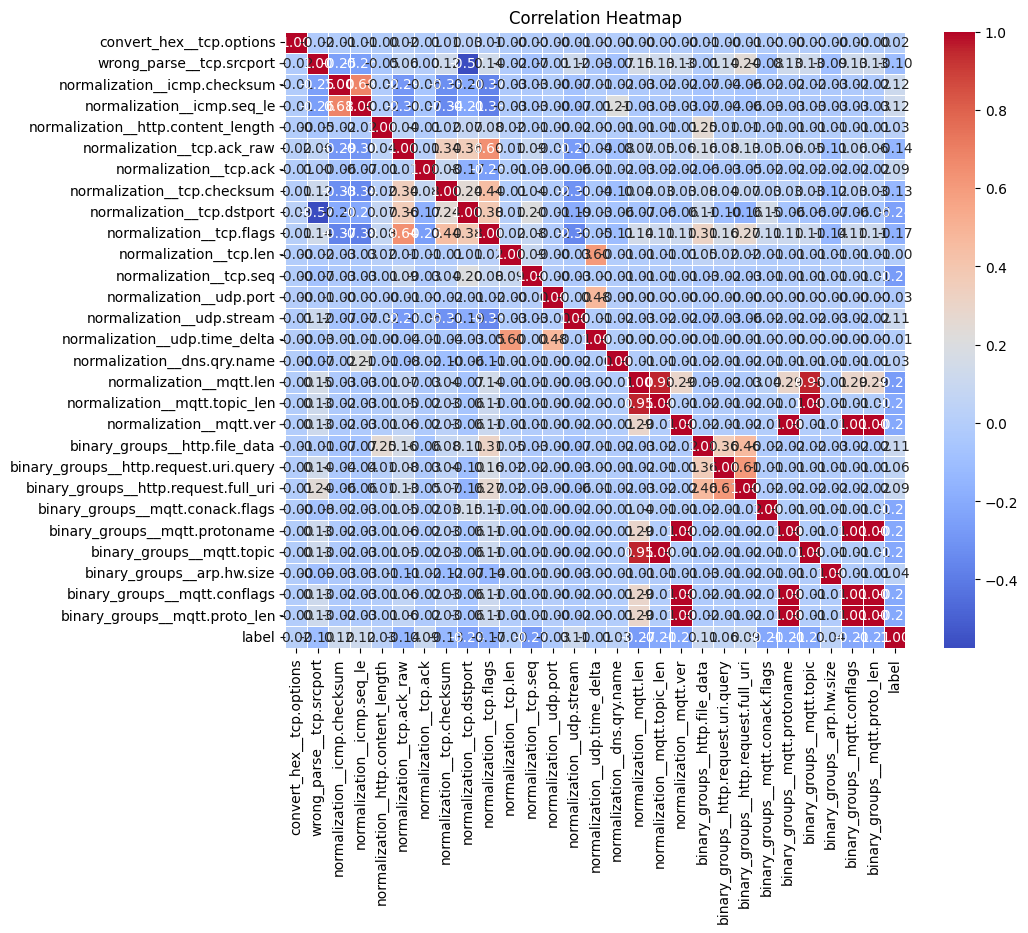

In [30]:
visualize_correlation(correlation_matrix)

<Axes: >

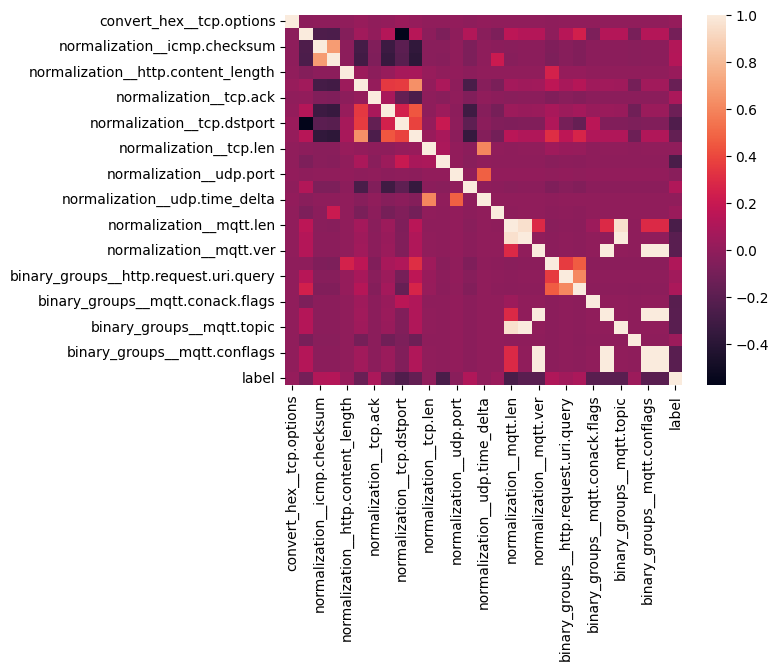

In [32]:
sns.heatmap(df_data_sta.corr())

#### Multilablel

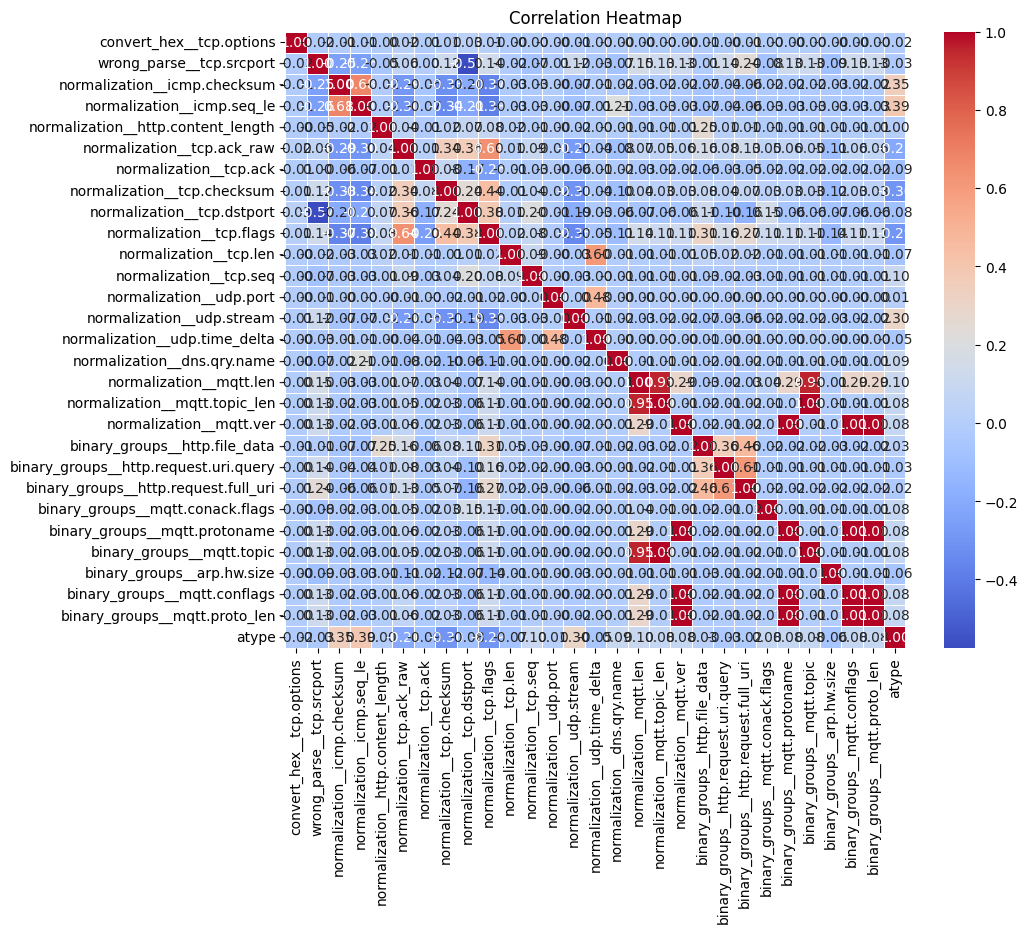

In [88]:
correlation_matrix = correlation_analysis(df_data_sta_multilabel)
visualize_correlation(correlation_matrix)

### Data distribution

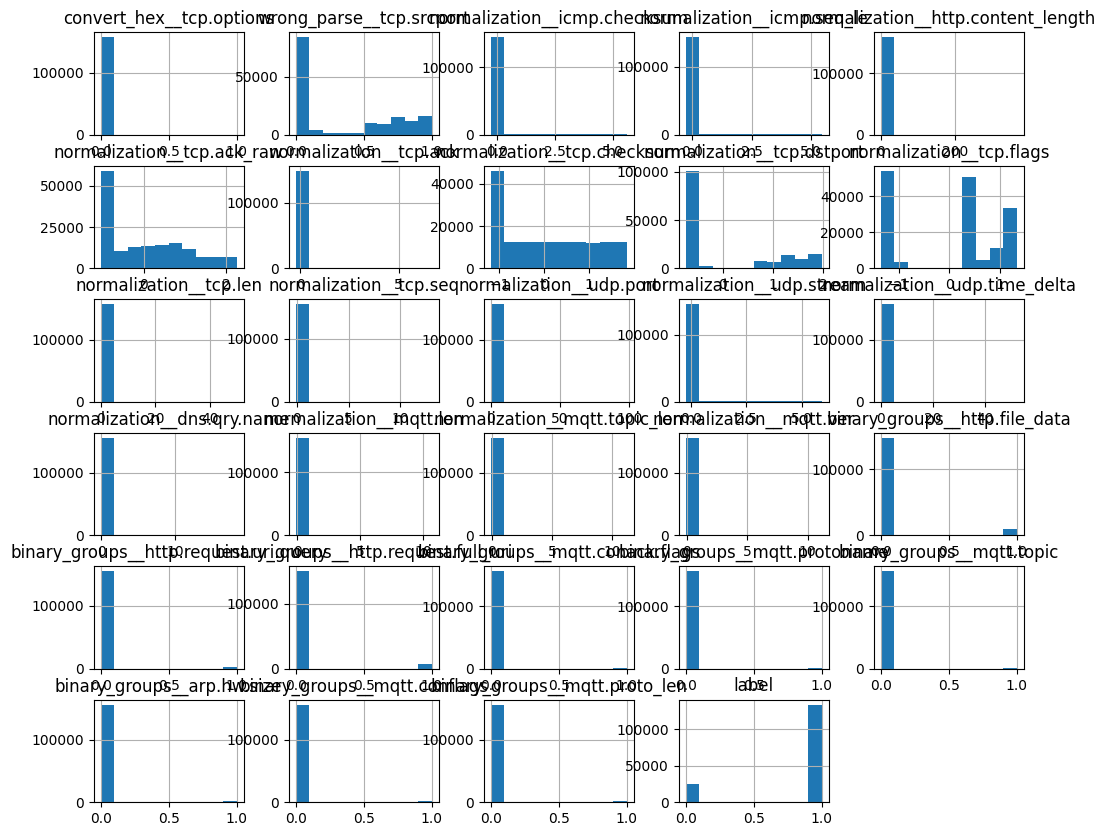

In [31]:
data_distribution(df_data_sta)

We can see several things here - 
1. The labels are not balanced (with much more attacks)
2. All other data types have one value much more frequent than the others (0 as it represents most of the times None)

### Feature improtance (Random Forest)

In [16]:
data = list(zip(df_data_sta.columns, feature_importance(df_data_sta.drop(columns=['label']), df_data_sta['label'])))


In [18]:
pd.DataFrame(data, columns=['column', 'importance'])

,column,importance
0,convert_hex__tcp.options,0.000075
1,wrong_parse__tcp.srcport,0.237463
2,normalization__icmp.checksum,0.000745
3,normalization__icmp.seq_le,0.000664
4,normalization__http.content_length,0.002169
5,normalization__tcp.ack_raw,0.026989
6,normalization__tcp.ack,0.044408
7,normalization__tcp.checksum,0.010037
8,normalization__tcp.dstport,0.270254
9,normalization__tcp.flags,0.071119


## PCA (dimensionality reduction)

In [20]:
d, pca = dimensionality_reduction(df_data_sta.drop(columns=['label']))

In [22]:
print(d)

14


PCA returned 14 which means that in order to preserve 95% of the data variance but still reduce the dimension we can reduce the dimesions of the data from 28 to 14!!

## Outliers detection

In [51]:
outliers = outlier_detection(df_data_sta)

In [52]:
outliers

convert_hex__tcp.options                 12067
wrong_parse__tcp.srcport                     0
normalization__icmp.checksum             14670
normalization__icmp.seq_le               15657
normalization__http.content_length        9460
normalization__tcp.ack_raw                   0
normalization__tcp.ack                   33619
normalization__tcp.checksum                  0
normalization__tcp.dstport                   0
normalization__tcp.flags                     0
normalization__tcp.len                   36107
normalization__tcp.seq                   35630
normalization__udp.port                    405
normalization__udp.stream                14536
normalization__udp.time_delta              405
normalization__dns.qry.name               1656
normalization__mqtt.len                   3785
normalization__mqtt.topic_len             1246
normalization__mqtt.ver                   1250
binary_groups__http.file_data             9471
binary_groups__http.request.uri.query     2751
binary_groups

It is difficult to get something from the function without dropping the min value, so i will run it on each column without the min value

In [75]:
for column in df_data_sta.columns:
    print(f"{column}\t{outlier_detection(df_data_sta[df_data_sta[column] != df_data_sta[column].min()][column])}")
    

convert_hex__tcp.options	15011
wrong_parse__tcp.srcport	0
normalization__icmp.checksum	0
normalization__icmp.seq_le	0
normalization__http.content_length	474
normalization__tcp.ack_raw	0
normalization__tcp.ack	23647
normalization__tcp.checksum	0
normalization__tcp.dstport	0
normalization__tcp.flags	20175
normalization__tcp.len	3686
normalization__tcp.seq	21564
normalization__udp.port	112
normalization__udp.stream	0
normalization__udp.time_delta	0
normalization__dns.qry.name	0
normalization__mqtt.len	0
normalization__mqtt.topic_len	0
normalization__mqtt.ver	0
binary_groups__http.file_data	0
binary_groups__http.request.uri.query	0
binary_groups__http.request.full_uri	0
binary_groups__mqtt.conack.flags	0
binary_groups__mqtt.protoname	0
binary_groups__mqtt.topic	0
binary_groups__arp.hw.size	0
binary_groups__mqtt.conflags	0
binary_groups__mqtt.proto_len	0
label	0


## Label imbalance

In [54]:
class_counts = label_imbalance(df_data_sta['label'])

In [55]:
class_counts

label
1    133499
0     24301
Name: count, dtype: int64

This might be problematic and cause the model to have more confusion labeling the data
(Need to split train, test and val with proportion to this data)

In [81]:
for col in df_label.columns:
    df_label[col], _ = pd.factorize(df_label[col])

In [85]:
label_imbalance(df_label['Attack_type'])

Attack_type
12    24301
13    14498
14    14090
2     10925
5     10561
4     10311
3     10269
6     10247
10    10195
9     10076
8     10071
11    10052
7      9989
0      1214
1      1001
Name: count, dtype: int64

The multiclass labels are more balanced than the binary classification (only the non-attack has more rows than the rest of them and attack 0 and 1 have less data)